# Reconhecimento facial com a arquitetura FaceNet

Este notebook corresponde a atividade prática da seção 3.7 no livro do curso. Nesta atividade o modelo FaceNet é usado para implementar um programa para reconhecimento facial. 

## 1 - Pacotes

Execute o bloco abaixo para importar os pacotes necessarios. 

- [tensorflow](https://www.tensorflow.org/) um framework para deep learning
- [numpy](www.numpy.org) pacote de bilbiotecas para computação científica.
- [matplotlib](http://matplotlib.org) biblioteca para desenho de gráficos.
- [opencv](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html) biblioteca para processamento de imagem.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

#arquivo local com a arquitetura facenet
import facenet


/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2 - Carregando um modelo pré-treinado

Nesta atividade é usado um modelo pré-treinado do FaceNet foi obitido no repositório [FaceMatch](https://github.com/arunmandal53/facematch), e que também está disponível para download no [GoogleDrive](https://drive.google.com/file/d/0B5MzpY9kBtDVZ2RpVDYwWmxoSUk) do autor do projeto oficial.

O código abaixo inicia a sessão no Tensorflow e carrega o modelo pré-treinado.

In [2]:
sess = tf.Session()

#Carregando do modelo pre−treinado 
facenet.load_model("20170512-110547/20170512-110547.pb")

Model filename: 20170512-110547/20170512-110547.pb


O código abaixo seleciona os tensores necessário para obter os embeddings das imagens faciais.

In [3]:
#Selecionando os tensores necessarios para execucao
image_placeholder = tf.get_default_graph().get_tensor_by_name("input:0") 
embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0") 
train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")

#imprimindo as informações dos tensores
print(image_placeholder)
print(embeddings)
print(train_placeholder)

Tensor("input:0", dtype=float32)
Tensor("embeddings:0", shape=(?, 128), dtype=float32)
Tensor("phase_train:0", dtype=bool)


A função abaixo utiliza os tensores do FaceNet carregados para obters os embeddings de uma imagem facial. Primeiro, o arquivo de imagem é aberto e redimensionado para o padrão aceito pelo FaceNet 160x160. Em seguida, a imagem é colocada como entrada e o placeholder de treinamento é setado como False. O embedding retornado da execução do grafo de computação é retornado, bem como a imagem que foi usada como entrada.

In [4]:
def get_embedding(img_path): 
    img_size = 160
    img = cv2.imread(img_path)
    #o opencv abre a imagem em BGR, necessario converter para RGB
    if img is None:
        print("Imagem não pode ser aberta.")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Preparando a imagem de entrada
    resized = cv2.resize(img, (img_size,img_size),interpolation=cv2.INTER_CUBIC)
    reshaped = resized.reshape(-1,img_size, img_size,3)
    #Configurando entrada e execucao do FaceNet
    feed_dict = {image_placeholder: reshaped, train_placeholder: False}
    embedding = sess.run(embeddings , feed_dict=feed_dict) 
    return embedding[0], img

## 3 - Registrando pessoas

A tarefa de reconhecimento facial tenta responder a pergunta "Quem é essa pessoa?". Para isso, é necessário registrar os embeddings de imagens faciais, para que dessa forma, seja possível realizar a comparação de similaridade entre as imagens faciais. Neste exemplo, são usadas imagens de algumas figuras públicas da política brasileira.

O código abaixo usa a função "get_embedding" para cadastrar os embeddings de cada imagem facial em um dicionário de indivíduos.

Tiririca - foto cadastrada:


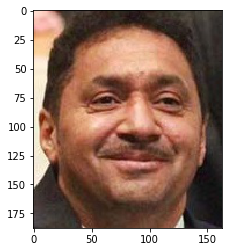

Bolsonaro - foto cadastrada:


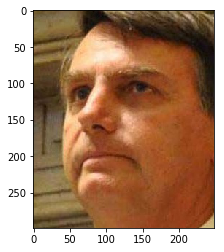

Maria - foto cadastrada:


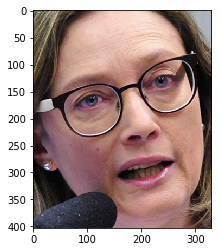

Daciolo - foto cadastrada:


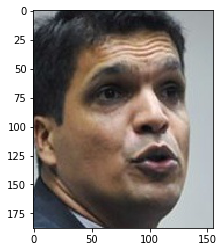

In [5]:
database = {}

database["tiririca"], img = get_embedding("faces/tiririca_0.jpg")
print("Tiririca - foto cadastrada:")
_ = plt.imshow(img)
plt.pause(0.1)

database["bolsonaro"], img = get_embedding("faces/bolsonaro_0.jpg")
print("Bolsonaro - foto cadastrada:")
_ = plt.imshow(img)
plt.pause(0.1)

database["maria"], img = get_embedding("faces/maria_0.jpg")
print("Maria - foto cadastrada:")
_ = plt.imshow(img)
plt.pause(0.1)

database["daciolo"], img = get_embedding("faces/daciolo_0.jpg")
print("Daciolo - foto cadastrada:")
_ = plt.imshow(img)



In [6]:
#Este é um exemplo de embedding
print("Facial Embedding do Tiririca:\n", database["tiririca"])

Facial Embedding do Tiririca:
 [ 2.41289474e-02 -6.72910828e-05  6.42202720e-02  2.87171248e-02
  5.97718656e-02  4.64095846e-02  9.15148184e-02 -2.90388037e-02
 -7.01143444e-02 -9.42358598e-02  9.65237767e-02 -1.36281133e-01
 -3.27048339e-02  1.18589468e-01 -1.20893471e-01 -1.19631886e-01
  8.64296481e-02 -1.72795072e-01 -3.29667442e-02 -8.93800259e-02
  1.23055629e-03 -1.98012888e-01  2.61256285e-02  7.34678358e-02
  5.98285496e-02  1.31229863e-01  1.07015982e-01  1.39821675e-02
  1.54304877e-02 -1.62680060e-01  3.86856683e-02  1.49562895e-01
 -2.58167721e-02 -1.45639628e-02 -3.43635455e-02  3.55457179e-02
  1.29150093e-01 -3.31389382e-02  7.53892735e-02  3.44860367e-02
 -1.08229909e-02  1.52418343e-03  5.94529547e-02 -3.94036062e-02
 -1.45783022e-01  1.33878917e-01  9.15359408e-02 -8.75926204e-03
 -2.35026479e-02 -1.28504798e-01  1.28514722e-01  7.28310198e-02
  7.25317150e-02  1.71265639e-02  1.14799710e-02  2.49069124e-01
  6.64105220e-03 -1.38305947e-01  1.39316097e-01  1.4162969

## 4 - Reconhecimento facial

Nesta etapa é realizado o processo de reconhecimento facial. Para isso, como dito anteriormente, é calculada a similaridade entre os embeddings das imagens faciais. Uma forma simples para calcular essa similaridade é usando a equação da distancia euclidiana, como mostra a função abaixo.

In [7]:
#Funcao que calcula a distancia euclidiana entre dois vetores
def distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2)**2))

A função "who_is_it" definida abaixo, identifica uma imagem facial. A função recebe como parâmetro o caminho de um arquivo de imagem e o dicionário de pessoas registradas. Resumidamente, essa função calcula a distancia euclidiana entre os embeddings da imagem de entrada e das pessoas registradas, o menor distancia é atribuida a identidade da pessoa.

In [10]:
def who_is_it(visitor_image_path, database):
    min_dist = 1000 
    identity = -1
    #Calculando o embedding do visitante
    visitor, img = get_embedding(visitor_image_path)
    #Calculando a distacia do visitante com os demais funcionarios
    for name, employee in database.items():
        dist = distance(visitor, employee)
        
        if dist < min_dist:
            min_dist = dist 
            identity = name
    #verificando a identidade
    if min_dist > 0.5:
        print("Essa pessoa nao esta cadastrada!")
        return None, img
    else:
        return identity, img
   

## 5 - Realizando testes

Na última etapa, a função "who_is_it" é utilizada para identificar uma imagem facial. No código abaixo são apresentados quatro exemplos de identificação.

Essa pessoa é o(a) tiririca !
Sou eu abestadoó!


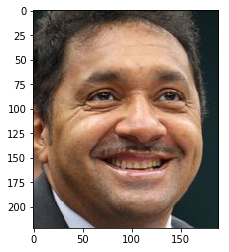

Essa pessoa é o(a) bolsonaro !


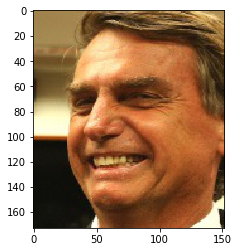

Essa pessoa é o(a) maria !


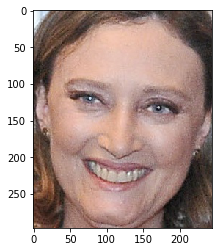

Essa pessoa é o(a) daciolo !
Glória a Deuxxx!


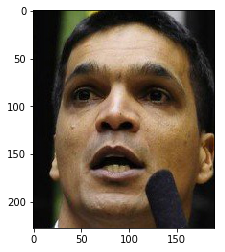

In [14]:
identity, img = who_is_it("faces/tiririca_1.jpg", database)
print("Essa pessoa é o(a)",identity,"!")
if identity == "tiririca":
    print("Sou eu abestadoó!")
_ = plt.imshow(img)
plt.pause(0.1)

identity, img = who_is_it("faces/bolsonaro_1.jpg", database)
print("Essa pessoa é o(a)",identity,"!")
_ = plt.imshow(img)
plt.pause(0.1)

identity, img = who_is_it("faces/maria_1.jpg", database)
print("Essa pessoa é o(a)",identity,"!")
_ = plt.imshow(img)
plt.pause(0.1)

identity, img = who_is_it("faces/daciolo_1.jpg", database)
print("Essa pessoa é o(a)",identity,"!")
if identity == "daciolo":
    print("Glória a Deuxxx!")
_ = plt.imshow(img)
plt.pause(0.1)
